In [32]:
#four-point-perspective-transform code

import numpy as np
import cv2
import matplotlib.pyplot as plt

def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    
    rect = np.zeros((4, 2), dtype = "float32")

    
    # example: of below
    # np.sum([[0, 1], [0, 5]], axis=0)
    # array([0, 6])
    # np.sum([[0, 1], [0, 5]], axis=1)
    # array([1, 5])
    
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    print s
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    print diff
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    print rect;
 
    # return the ordered coordinates
    return rect


In [33]:

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    
    #-----------------------------WHY ORDERING OF POINTS ISNECESSARY---------------------------------##
    #-----ordering pf points is necessary, so as to find which of the points are of top-left, top-right
    #------bottom-left, or bottom-right
    #------this is necessary to handle the case where we may get unordered points on the image boundary
    
    rect = order_points(pts)
    #now, got the ordered coordinates
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    # x**2 = is sqaure of x
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped


[ 55. 435. 890. 510.]
[[ -25.]
 [-405.]
 [  50.]
 [ 430.]]
[[ 40.  15.]
 [420.  15.]
 [420. 470.]
 [ 40. 470.]]


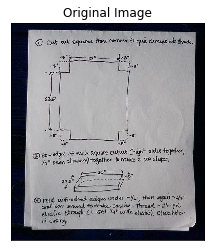

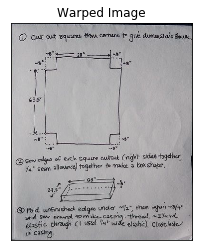

In [35]:
 
# load the image and grab the source coordinates (i.e. the list of
# of (x, y) points)
image = cv2.imread("images/doc2.jpg")
pts = np.array([(40, 15), (420, 15), (420, 470), (40, 470)], dtype = "float32")
 
# apply the four point tranform to obtain a "birds eye view" of
# the image
warped = four_point_transform(image, pts)
 
plt.imshow(image)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.show()
                   
plt.imshow(warped)
plt.title("Warped Image")
plt.xticks([]), plt.yticks([])
plt.show()